In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
import os
import glob
from sklearn.feature_extraction.text import *
import pickle
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [52]:

files_female = glob.glob(os.path.join(os.getcwd(), "/content/drive/MyDrive/twitter-gender-corpus/female", "*.txt"))
files_male = glob.glob(os.path.join(os.getcwd(), "/content/drive/MyDrive/twitter-gender-corpus/male", "*.txt"))
female = []
male = []


for file_path in files_female:
    with open(file_path) as f_input:
        female.append(f_input.read().split('\n')) #import txt files and splitting lines by new lines

for file_path in files_male:
    with open(file_path) as f_input:
        male.append(f_input.read().split('\n'))

In [53]:
female = [ item for elem in female for item in elem] #flattening nested lists, so every row of dataset has one tweet
male = [item for elem in male for item in elem]

In [54]:
male_tweets = pd.DataFrame(male, columns = ['tweets'])
female_tweets = pd.DataFrame(female, columns=['tweets'])

In [55]:
male_tweets = male_tweets.assign(gender = 'male') #assigning gender
female_tweets = female_tweets.assign(gender = 'female')

In [56]:
male_tweets.head()

,tweets,gender
0,@happynsx @brunalove2 @katherine_real @geminis...,male
1,@juanalcides @noshhe @happynsx @brunalove2 @ka...,male
2,@geminisandrea @juanalcides @noshhe @happynsx ...,male
3,“@jaganadhg: NLP Programming Tutorial http://l...,male
4,“@jmgomez: RT @gsantosgo: Cheat sheet for pred...,male


In [57]:
male_tweets.dtypes

tweets    object
gender    object
dtype: object

In [58]:
female_tweets.head()

,tweets,gender
0,"New London Calling Undisguised blog post, foll...",female
1,Let&#39;s hope the Year of the Snake is a good...,female
2,"Fast is my first, middle and last name. I just...",female
3,I&#39;ve always looked good in silver. I ran m...,female
4,"From a London point of view, I wonder if the #...",female


In [59]:
female_tweets.dtypes

tweets    object
gender    object
dtype: object

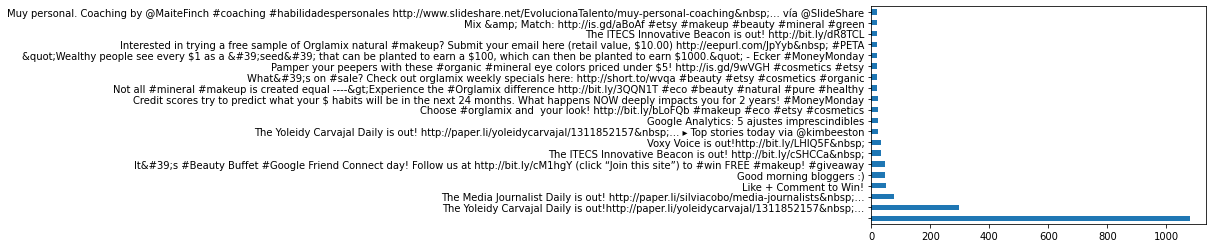

In [60]:
female_tweets['tweets'].value_counts()[:20].plot(kind='barh')

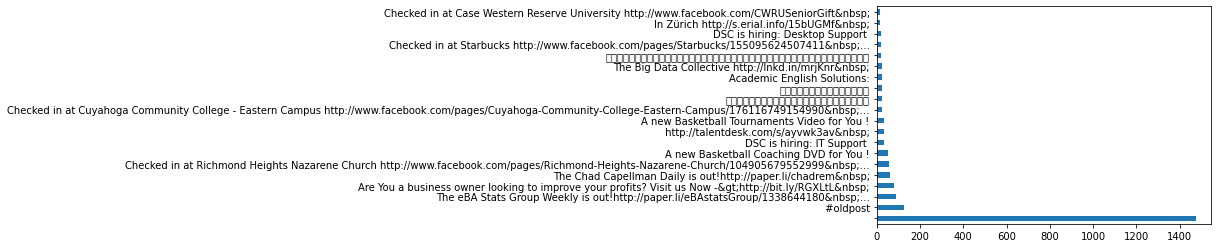

In [61]:
male_tweets['tweets'].value_counts()[:20].plot(kind = 'barh')

In [82]:
data = pd.concat([male_tweets,female_tweets], axis = 0) #joining datasets to one dataframe
data = data.reset_index(drop = True)

In [63]:
data.head()

,tweets,gender
0,@happynsx @brunalove2 @katherine_real @geminis...,male
1,@juanalcides @noshhe @happynsx @brunalove2 @ka...,male
2,@geminisandrea @juanalcides @noshhe @happynsx ...,male
3,“@jaganadhg: NLP Programming Tutorial http://l...,male
4,“@jmgomez: RT @gsantosgo: Cheat sheet for pred...,male


In [64]:
#extracting stylometric features
def stylometric_features(dataframe_column):

  df = pd.DataFrame() 
  df['Uppercase'] = dataframe_column.str.findall(r'[A-Z]').str.len()
  df['Lowercase'] = dataframe_column.str.findall(r'[a-z]').str.len()
  df['spaces'] = dataframe_column.str.findall(r'\S+').str.len()
  df['digits'] = dataframe_column.str.findall(r'[^0-9]').str.len()
#digits
  full_stops = []
  at = []
  commas = []
  open_bracket = []
  open_bracket = []
  close_bracket =[]
  exclamation =[]
  dash =[]
  question_mark =[]
  percentage = []
  ampersand =[]
  hashtag =[]
  underscore =[]
  equal = []
  semicolon = []
  colon = []
  forward_slash = []

  for i in dataframe_column:
    full_stops.append(i.count('.'))
    commas.append(i.count(','))
    at.append(i.count('@'))
    open_bracket.append(i.count('('))
    close_bracket.append(i.count(')'))
    exclamation.append(i.count('!'))
    dash.append(i.count('-'))
    question_mark.append(i.count('?'))
    percentage.append(i.count('%'))
    ampersand.append(i.count('&'))
    hashtag.append(i.count('#'))
    underscore.append(i.count('_'))
    equal.append(i.count('='))
    semicolon.append(i.count(';'))
    colon.append(i.count(':'))
    forward_slash.append(i.count('/'))


  df['full_stops'] = full_stops
  df['at'] = at
  df['commas'] = commas
  df['open_bracket'] = open_bracket
  df['close_bracet'] = close_bracket
  df['exclamation'] = exclamation
  df['dash'] = dash
  df['question_mark'] =  question_mark
  df['percentage'] = percentage
  df['ampersand'] = ampersand
  df['hashtag'] = hashtag
  df['underscore'] = underscore
  df['equal'] = equal
  df['semicolon'] = semicolon
  df['colon'] = colon
  df['forward_slash'] = forward_slash

  df.to_csv('stylometric_features.csv')

  return df

In [65]:
df = stylometric_features(data['tweets'])

In [66]:
df.head()

,Uppercase,Lowercase,spaces,digits,full_stops,at,commas,open_bracket,close_bracet,exclamation,dash,question_mark,percentage,ampersand,hashtag,underscore,equal,semicolon,colon,forward_slash
0,3,133,13,180,3,7,0,0,0,0,2,0,0,0,0,1,4,0,1,6
1,3,134,13,181,3,7,0,0,0,0,2,0,0,0,0,1,4,0,1,6
2,3,133,13,180,3,7,0,0,0,0,2,0,0,0,0,1,4,0,1,6
3,12,72,9,107,1,4,0,0,0,0,0,0,0,1,1,0,0,1,2,3
4,5,67,12,89,0,2,0,0,0,0,0,0,0,0,1,0,0,0,2,0


In [83]:
#removing punctuation marks and lowercasing
def clean(dataframe_column):
  dataframe_column = dataframe_column.str.replace('[^\w\s]','')
  dataframe_column = dataframe_column.str.lower()
  dataframe_column = dataframe_column.str.replace(r'[0-9]+','')
  return dataframe_column
#s.translate(None, digits)


In [84]:
data['tweets'] = clean(data['tweets'])

In [85]:
data.head()

,tweets,gender
0,happynsx brunalove katherine_real geminisandre...,male
1,juanalcides noshhe happynsx brunalove katherin...,male
2,geminisandrea juanalcides noshhe happynsx brun...,male
3,jaganadhg nlp programming tutorial httplnkdinh...,male
4,jmgomez rt gsantosgo cheat sheet for predictio...,male


In [20]:
#label encode the gender column
#0 = male
#1 = female
data['encoded_gender'] =  np.where(data['gender'] == 'male', 0, 1)

In [21]:
data = data.drop(columns = ['gender'])

In [22]:
data

,tweets,encoded_gender
0,happynsx brunalove katherine_real geminisandre...,0
1,juanalcides noshhe happynsx brunalove katherin...,0
2,geminisandrea juanalcides noshhe happynsx brun...,0
3,jaganadhg nlp programming tutorial httplnkdinh...,0
4,jmgomez rt gsantosgo cheat sheet for predictio...,0
...,...,...
278836,creativedynamix instinctive work art created ...,1
278837,i hate os new iphone app end of nov im practic...,1
278838,before some on suggests the iphone app is fre...,1
278839,the o new iphone app is impractical rubbish im...,1


In [23]:
#implementing n-gram model b words and characters

vect_word = CountVectorizer(strip_accents='unicode',  analyzer='word',  token_pattern=r'\w{1,}',  stop_words='english',  ngram_range=(1, 3), max_features = (1000))
vect_character = CountVectorizer(strip_accents='unicode',  analyzer='char',  stop_words='english',  ngram_range=(3,10), max_features = (100))
print(vect_word)
print(vect_character)


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=1000, min_df=1,
                ngram_range=(1, 3), preprocessor=None, stop_words='english',
                strip_accents='unicode', token_pattern='\\w{1,}',
                tokenizer=None, vocabulary=None)
CountVectorizer(analyzer='char', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=100, min_df=1,
                ngram_range=(3, 10), preprocessor=None, stop_words='english',
                strip_accents='unicode', token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


In [24]:
word_ngram = vect_word.fit_transform(list(data.tweets))
counts_words = pd.DataFrame(word_ngram.toarray(),
                      columns=vect_word.get_feature_names())


In [25]:
counts_words.head()

,able,access,account,action,actually,ad,add,added,ads,advertising,advice,africa,age,ago,agree,ah,ahead,air,airport,al,alt,amazing,amazon,america,american,amp,amp spreading,amp spreading survey,analysis,analytics,android,animalworld,answer,aom,app,apple,apps,april,archive,area,...,won,wonder,wonderful,wont,word,word day,words,work,working,works,workshop,world,worlds,worst,worth,wow,write,writers,writing,wrong,x,y,ya,yahoo,yay,yeah,year,years,yes,yesterday,yoleidy,yoleidy carvajal,yoleidy carvajal daily,york,youll,young,youre,youtube,youtube video,youve
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
'''character_ngram = vect_character.fit_transform(list(data.tweets))
counts_character = pd.DataFrame(character_ngram.toarray(),
                      columns=vect_character.get_feature_names())
counts_character.head()'''

'character_ngram = vect_character.fit_transform(list(data.tweets))\ncounts_character = pd.DataFrame(character_ngram.toarray(),\n                      columns=vect_character.get_feature_names())\ncounts_character.head()'

In [27]:
#joining word n-grams dataset with encoded gender column
word_features = pd.concat([counts_words, data['encoded_gender']], axis = 1)

In [28]:
word_features.head(2)

,able,access,account,action,actually,ad,add,added,ads,advertising,advice,africa,age,ago,agree,ah,ahead,air,airport,al,alt,amazing,amazon,america,american,amp,amp spreading,amp spreading survey,analysis,analytics,android,animalworld,answer,aom,app,apple,apps,april,archive,area,...,wonder,wonderful,wont,word,word day,words,work,working,works,workshop,world,worlds,worst,worth,wow,write,writers,writing,wrong,x,y,ya,yahoo,yay,yeah,year,years,yes,yesterday,yoleidy,yoleidy carvajal,yoleidy carvajal daily,york,youll,young,youre,youtube,youtube video,youve,encoded_gender
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
#separating x and y datasets
x = word_features.iloc[:, :-1]
y = word_features[['encoded_gender']]

In [30]:
y.shape

(278841, 1)

In [31]:
#feature extraction using extratressclassifier

clf = ExtraTreesClassifier(n_estimators = 10)
clf = clf.fit(x, y.values.ravel())


In [32]:
model = SelectFromModel(clf, prefit=True)
x_new = model.transform(x)
x_new.shape  #new shape of x after feature seelction             


(278841, 332)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, train_size = 0.7, random_state = 42)

In [34]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(195188, 332)
(83653, 332)
(195188, 1)
(83653, 1)


In [35]:
#performing logistic regression on dataset

logr = LogisticRegression(max_iter=7600) #max_iterations set to a high number as model maxed out on lower numbers
logr.fit(x_train, y_train.values.ravel())
logr_pred = logr.predict(x_test)

In [36]:
#print(accuracy_score(y_test, logr_pred))
logr_pred = logr.predict(x_test)

In [50]:
logr.score(x_test, y_test)

0.634956307604031

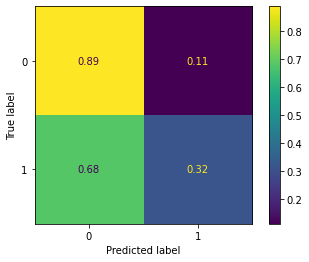

In [37]:
plot_confusion_matrix(logr, x_test, y_test, normalize = 'true')


In [38]:
logr_pred = pd.DataFrame(logr_pred)
#logr_pred = np.where(logr_pred.columns[0] == 0, 'male', 'female')



In [39]:
logr_pred = logr_pred.replace(0,'male')
logr_pred = logr_pred.replace(1,'female')

In [40]:
true_label= pd.DataFrame
true_label = y_test
true_label = true_label.replace(0,'male')
true_label = true_label.replace(1,'female')
true_label = true_label.reset_index(drop = True)

In [41]:
logr_predictions = pd.concat([logr_pred, true_label], axis = 1)
logr_predictions.head()

,0,encoded_gender
0,male,male
1,female,female
2,male,female
3,male,female
4,male,male


In [42]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
rfc_pred = rfc.predict(x_test)

In [44]:
rfc.score(x_test, y_test)

0.6632876286564737

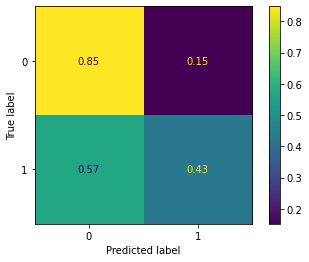

In [45]:
plot_confusion_matrix(rfc, x_test, y_test, normalize = 'true')

In [46]:
#best model is randomforestclassifier

In [47]:
rfc_pred = pd.DataFrame(rfc_pred)
rfc_pred = rfc_pred.replace(0,'male')
rfc_pred = rfc_pred.replace(1,'female')

In [48]:
rfc_predictions = pd.concat([rfc_pred, true_label], axis = 1)
rfc_predictions.head()

,0,encoded_gender
0,male,male
1,female,female
2,female,female
3,female,female
4,male,male


In [49]:
filename = 'best_model.sav'
pickle.dump(model, open(filename, 'wb'))